# GRIP Task 1: Prediction using supervised ML
## Author: Rahul Bajaj

Here we will be applying linear regression algorithm to predict the score obtained by a student based on number of study hours.

## Importing libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## reading the given dataset

In [23]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## checking for null values

In [24]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

## plot the graph from the data

we can observe characteristics of Linear Regression from the graph.

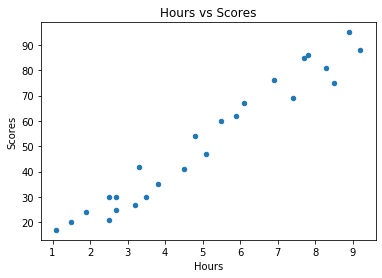

In [25]:
data.plot.scatter(x="Hours",y="Scores")
plt.title("Hours vs Scores")
plt.show();

## split our data based on independent variable(X) and dependent variable(y)

In [26]:
X=data.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [27]:
y=data.iloc[:,-1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## splitting our model into training and testing dataset for model training

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
print(X_train)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [30]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


## Model Building: implementing our classifier based on Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## plotting the Linear Regression graph

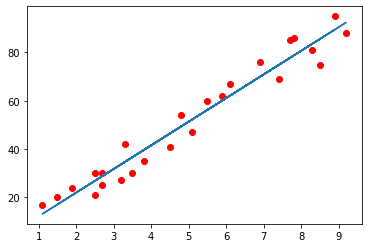

In [32]:
plt.scatter(X, y, color='red')
plt.plot(X, ((regressor.coef_ * X) + regressor.intercept_))
plt.show()

## predict the model for our test dataset

In [33]:
y_pred=regressor.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

## compare actual and predicted value to know how good is our classifier

In [34]:
d1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## r2 testing
The closer the value of R2 is to 1 the better the model fits our data.    

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9568211104435257

## values for training and test scores

As there is not much difference between training and testing dataset, our model is not overfitted.

In [36]:
print("training score:",regressor.score(X_train,y_train))
print("testing score:",regressor.score(X_test,y_test))

training score: 0.9484997422695115
testing score: 0.9568211104435257


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [37]:
regressor.predict([[9.25]])

array([92.91505723])

## Result
If a student studies for 9.25 hours his/her predicted score will be 92.9